In [22]:
import io, os, sys, types
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [23]:
import nbformat

from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

In [24]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [25]:
class NotebookLoader(object):
    """Module Loader for IPython Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing notebook from %s" % path)
                                       
        # load the notebook object
        nb = nbformat.read(path, as_version=4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [26]:
class NotebookFinder(object):
    """Module finder that locates IPython Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [27]:
sys.meta_path.append(NotebookFinder())

In [28]:
import EDA

In [29]:
joined_data = EDA.joined_data

In [30]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [35]:
final_numeric_data = EDA.final_numeric_data

In [36]:
# Set features to use
features = ['Tavg', 'Heat'] + \
           filter(lambda x: x.startswith('Species_'), EDA.final_numeric_data.columns) + \
           filter(lambda x: x.startswith('AddressNumberAndStreet_'), EDA.final_numeric_data.columns)

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [37]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.897
Accuracy: 0.861


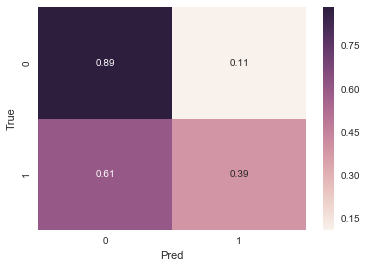

Confusion Matrix:
[[7055  892]
 [ 278  180]]


In [40]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

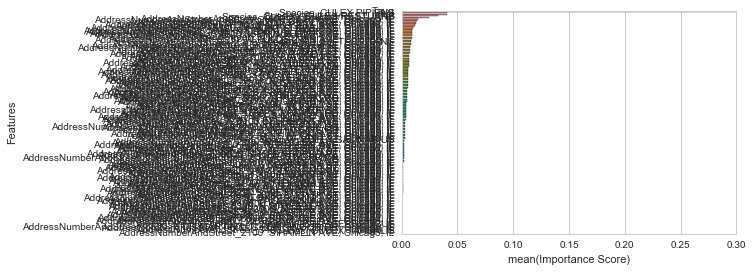

In [39]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [41]:
print features

Index([u'Tavg', u'Heat', u'Species_CULEX ERRATICUS', u'Species_CULEX PIPIENS',
       u'Species_CULEX PIPIENS/RESTUANS', u'Species_CULEX RESTUANS',
       u'Species_CULEX SALINARIUS', u'Species_CULEX TARSALIS',
       u'Species_CULEX TERRITANS',
       u'AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL',
       ...
       u'AddressNumberAndStreet_8200  S KOSTNER AVE, Chicago, IL',
       u'AddressNumberAndStreet_8900  S CARPENTER ST, Chicago, IL',
       u'AddressNumberAndStreet_8900  S MUSKEGON AVE, Chicago, IL',
       u'AddressNumberAndStreet_9000  W GARFIELD BLVD, Chicago, IL',
       u'AddressNumberAndStreet_9100  W HIGGINS AVE, Chicago, IL',
       u'AddressNumberAndStreet_9100  W HIGGINS RD, Chicago, IL',
       u'AddressNumberAndStreet_9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL',
       u'AddressNumberAndStreet_9600  S HOYNE AVE, Chicago, IL',
       u'AddressNumberAndStreet_9600  S LONGWOOD DR, Chicago, IL',
       u'AddressNumberAndStreet_9800  S AVENUE G, Chicago, I

In [42]:
print feature_importances

[  2.99647197e-01   4.02806016e-02   1.06657419e-04   4.06382792e-02
   2.44973332e-02   3.29989698e-02   2.61582392e-03   8.19899501e-06
   8.79732300e-03   6.94524165e-03   9.37893695e-03   1.07616894e-03
   4.72532659e-03   9.72047353e-03   3.89150373e-03   1.10163021e-03
   1.40430128e-02   1.48514786e-02   5.50124563e-03   5.40516352e-03
   6.81742967e-03   6.20078353e-03   2.75995570e-03   1.07208748e-03
   1.68433381e-04   5.71658877e-03   7.17998276e-03   1.29706584e-02
   2.42300334e-03   8.63207855e-03   6.30744129e-03   1.13179360e-03
   5.93037073e-03   3.36712498e-03   1.11916768e-03   2.58765236e-04
   1.46482015e-03   9.87046035e-04   3.83574136e-03   6.68025253e-03
   2.14036755e-03   4.72099223e-04   9.06628380e-04   7.72840953e-04
   1.72937758e-03   2.61090671e-03   5.38389773e-04   1.31712254e-06
   5.37086280e-03   5.97315477e-03   7.33945758e-03   2.83090953e-03
   4.00386459e-03   6.88179999e-04   5.33910931e-03   4.94432433e-03
   2.58996283e-04   4.38549218e-03

In [43]:
features.tolist()

['Tavg',
 'Heat',
 'Species_CULEX ERRATICUS',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL',
 'AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL',
 'AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL',
 'AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL',
 'AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL',
 'AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL',
 'AddressNumberAndStreet_1000  W 95TH ST, Chicago, IL',
 'AddressNumberAndStreet_1000  W OHARE AIRPORT, Chicago, IL',
 'AddressNumberAndStreet_1000  W OHARE, Chicago, IL',
 'AddressNumberAndStreet_1100  S ARTESIAN AVE, Chicago, IL',
 'AddressNumberAndStreet_1100  S ASHLAND AVE, Chicago, IL',
 'AddressNumberAndStreet_1100  S AVENUE L, Chicago, IL',
 'AddressNumberAndStreet_1100  S CALIFORNIA, Chicago, IL',
 'Add

In [44]:
features_list = features.tolist()

In [45]:
feature_importances.tolist()

[0.2996471973202701,
 0.04028060155273305,
 0.00010665741920648939,
 0.04063827922742707,
 0.024497333245729783,
 0.03299896982460254,
 0.0026158239235936666,
 8.19899501346194e-06,
 0.008797322996336478,
 0.006945241651233398,
 0.009378936952717248,
 0.0010761689351859159,
 0.0047253265919449065,
 0.009720473533625658,
 0.0038915037271670533,
 0.001101630212534083,
 0.01404301275868015,
 0.01485147860763016,
 0.00550124563136537,
 0.005405163515409487,
 0.006817429665042454,
 0.006200783529919556,
 0.0027599556975260757,
 0.0010720874808849861,
 0.00016843338052373934,
 0.005716588772540953,
 0.007179982762863765,
 0.012970658371905627,
 0.0024230033422434323,
 0.008632078550542202,
 0.006307441293928446,
 0.0011317936037244503,
 0.005930370729688468,
 0.003367124983515571,
 0.001119167681851496,
 0.0002587652361546279,
 0.0014648201544239007,
 0.0009870460349251267,
 0.003835741364977481,
 0.0066802525321813435,
 0.0021403675470026513,
 0.0004720992230125589,
 0.0009066283797253734,


In [48]:
feature_importances_list = feature_importances.tolist()

In [53]:
features_dictionary = []
count = 0
for feature_importance in features_list:
    feature_info = []
    feature_info.append(feature_importance)
    feature_info.append(feature_importances[count])
    count += 1
    #print feature_info
    features_dictionary.append(feature_info)

In [54]:
features_dictionary

[['Tavg', 0.29964719732027012],
 ['Heat', 0.040280601552733053],
 ['Species_CULEX ERRATICUS', 0.00010665741920648939],
 ['Species_CULEX PIPIENS', 0.04063827922742707],
 ['Species_CULEX PIPIENS/RESTUANS', 0.024497333245729783],
 ['Species_CULEX RESTUANS', 0.032998969824602542],
 ['Species_CULEX SALINARIUS', 0.0026158239235936666],
 ['Species_CULEX TARSALIS', 8.1989950134619406e-06],
 ['Species_CULEX TERRITANS', 0.0087973229963364784],
 ['AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL',
  0.0069452416512333984],
 ['AddressNumberAndStreet_1000  N CENTRAL PARK DR, Chicago, IL',
  0.009378936952717248],
 ['AddressNumberAndStreet_1000  S CALIFORNIA AVE, Chicago, IL',
  0.0010761689351859159],
 ['AddressNumberAndStreet_1000  S COTTAGE GROVE, Chicago, IL',
  0.0047253265919449065],
 ['AddressNumberAndStreet_1000  S STONY ISLAND AVE, Chicago, IL',
  0.0097204735336256579],
 ['AddressNumberAndStreet_1000  S VINCENNES, Chicago, IL',
  0.0038915037271670533],
 ['AddressNumberAndStreet_1000  W

In [64]:
# top 10 features
top_10_features = []
count = 0
# get the top 10 features
while count < 10:
    #top_10_features.append(features_dictionary[count])
    top_10_features.append(features_dictionary[count][0])
    count += 1
    

In [65]:
top_10_features

['Tavg',
 'Heat',
 'Species_CULEX ERRATICUS',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'AddressNumberAndStreet_1000  E 67TH ST, Chicago, IL']

In [69]:
# Set features to use
features = top_10_features

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = final_numeric_data[features]
y = final_numeric_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [70]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.600
Accuracy: 0.609


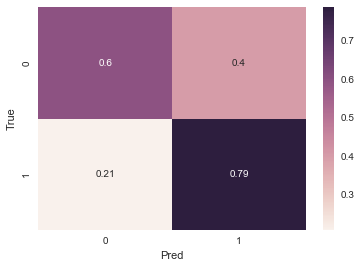

Confusion Matrix:
[[4757 3190]
 [  96  362]]


In [72]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

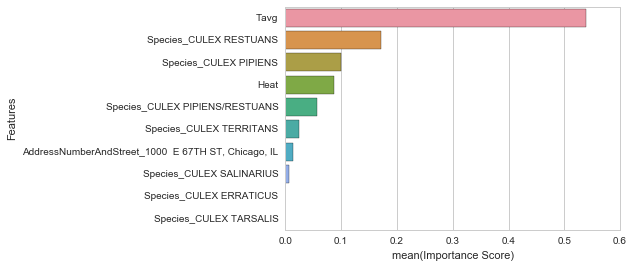

In [73]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [74]:
# use labelencoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [106]:
le.fit(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX TERRITANS'])

LabelEncoder()

In [107]:
list(le.classes_)

['CULEX ERRATICUS',
 'CULEX PIPIENS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX SALINARIUS',
 'CULEX TARSALIS',
 'CULEX TERRITANS']

In [108]:
le.transform(joined_data['Species'])

array([2, 2, 3, ..., 2, 2, 2])

In [110]:
new_species_column = le.transform(joined_data['Species'])

In [111]:
joined_data['Species'] = new_species_column

In [112]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",3,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",3,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",3,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",3,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",2,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",2,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",3,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",3,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [113]:
joined_data.Species

0        2
1        2
2        3
3        3
4        3
5        3
6        2
7        2
8        3
9        3
10       3
11       3
12       3
13       3
14       2
15       2
16       3
17       3
18       3
19       3
20       2
21       2
22       2
23       2
24       3
25       3
26       2
27       2
28       3
29       3
        ..
20982    2
20983    2
20984    1
20985    1
20986    2
20987    2
20988    2
20989    2
20990    1
20991    1
20992    2
20993    2
20994    2
20995    2
20996    2
20997    2
20998    1
20999    1
21000    2
21001    2
21002    2
21003    2
21004    2
21005    2
21006    2
21007    2
21008    2
21009    2
21010    2
21011    2
Name: Species, dtype: int64

In [133]:
le.fit(['1000  E 67TH ST, Chicago, IL', '1000  N CENTRAL PARK DR, Chicago, IL',
 '1000  S CALIFORNIA AVE, Chicago, IL', '1000  S COTTAGE GROVE, Chicago, IL',
 '1000  S STONY ISLAND AVE, Chicago, IL', '1000  S VINCENNES, Chicago, IL',
 '1000  W 95TH ST, Chicago, IL', '1000  W OHARE AIRPORT, Chicago, IL',
 '1000  W OHARE, Chicago, IL', '1100  S ARTESIAN AVE, Chicago, IL',
 '1100  S ASHLAND AVE, Chicago, IL', '1100  S AVENUE L, Chicago, IL',
 '1100  S CALIFORNIA, Chicago, IL', '1100  S PEORIA ST, Chicago, IL',
 '1100  S STATE ST, Chicago, IL', '1100  S WALLACE ST, Chicago, IL',
 '1100  W CHICAGO, Chicago, IL', '1100  W ROOSEVELT, Chicago, IL',
 '1200  S DOTY AVE, Chicago, IL', '1200  W GREENLEAF AVE, Chicago, IL',
 '1300  N LARAMIE AVE, Chicago, IL', '1300  S BRANDON, Chicago, IL',
 '1300  S MACKINAW, Chicago, IL', '1300  S TORRENCE AVE, Chicago, IL',
 '1400  N HUMBOLDT DR, Chicago, IL', '1500  N LONG AVE, Chicago, IL',
 '1500  W GRANVILLE AVE, Chicago, IL', '1500  W WEBSTER AVE, Chicago, IL',
 '1700  N ASHLAND AVE, Chicago, IL', '1700  N PULASKI RD, Chicago, IL',
 '1700  W 95TH ST, Chicago, IL', '1700  W ADDISON ST, Chicago, IL',
 '1800  W FARWELL AVE, Chicago, IL', '1800  W LELAND AVE, Chicago, IL',
 '2000  E 111TH ST, Chicago, IL', '2100  N CANNON DR, Chicago, IL',
 '2100  N LAWLER AVE, Chicago, IL', '2100  N STAVE ST, Chicago, IL',
 '2100  S HAMLIN AVE, Chicago, IL', '2200  N CANNON DR, Chicago, IL',
 '2200  W 113TH ST, Chicago, IL', '2200  W 51ST ST, Chicago, IL',
 '2200  W 69TH ST, Chicago, IL', '2200  W 89TH ST, Chicago, IL',
 '2200  W PERSHING RD, Chicago, IL', '2400  E 105TH ST, Chicago, IL',
 '2500  S MILLARD AVE, Chicago, IL', '2500  S THROOP, Chicago, IL',
 '2500  W GRAND AVE, Chicago, IL', '2700  S WESTERN AVE, Chicago, IL',
 '2800  N FRANCISCO AVE, Chicago, IL', '2900  W 85TH ST, Chicago, IL',
 '3000  S HOYNE AVE, Chicago, IL', '3000  W 18TH ST, Chicago, IL',
 '3300  E RANDOLPH ST, Chicago, IL', '3300  N RUTHERFORD AVE, Chicago, IL',
 '3300  W 104TH ST, Chicago, IL', '3400  W 77TH ST, Chicago, IL',
 '3500  W 116TH ST, Chicago, IL', '3500  W 51ST ST, Chicago, IL',
 '3600  N PITTSBURGH AVE, Chicago, IL', '3700  E 118TH ST, Chicago, IL',
 '3700  N KEDVALE AVE, Chicago, IL', '3700  S PULASKI RD, Chicago, IL',
 '3800  E 115TH ST, Chicago, IL', '3800  N CALIFORNIA AVE, Chicago, IL',
 '3900  N SPRINGFIELD AVE, Chicago, IL', '3900  S ASHLAND AVE, Chicago, IL',
 '4000  E 130TH ST, Chicago, IL', '4000  N AUSTIN AVE, Chicago, IL',
 '4000  N TRIPP AVE, Chicago, IL', '4000  S DEARBORN ST, Chicago, IL',
 '4100  N OAK PARK AVE, Chicago, IL', '4200  N RICHMOND ST, Chicago, IL',
 '4200  W 127TH PL, Chicago, IL', '4200  W 31ST ST, Chicago, IL',
 '4200  W 65TH ST, Chicago, IL', '4300  N ASHLAND AVE OVERPASS, Chicago, IL',
 '4500  N CAMPBELL AVE, Chicago, IL', '4600  N MILWAUKEE AVE, Chicago, IL',
 '4700  S CORNELL AVE, Chicago, IL', '4800  W MONTANA ST, Chicago, IL',
 '4900  W BALMORAL AVE, Chicago, IL', '4900  W SUNNYSIDE AVE, Chicago, IL',
 '5000  S CENTRAL AVE, Chicago, IL', '5000  S UNION AVE, Chicago, IL',
 '5100  N MONT CLARE AVE, Chicago, IL', '5100  W 72ND ST, Chicago, IL',
 '5200  S KOLMAR, Chicago, IL', '5200  S NORDICA, Chicago, IL',
 '5200  W 63RD ST, Chicago, IL', '5300  N STREETER DR, Chicago, IL',
 '5800  N PULASKI RD, Chicago, IL', '5800  N RIDGE AVE, Chicago, IL',
 '5800  N WESTERN AVE, Chicago, IL', '6000  N AVONDALE AVE, Chicago, IL',
 '6000  W MONTROSE DR, Chicago, IL', '6000  W ROSCOE ST, Chicago, IL',
 '6100  N LEMONT AVE, Chicago, IL', '6100  S MELVINA AVE, Chicago, IL',
 '6100  W FULLERTON AVE, Chicago, IL', '6200  N MANDELL AVE, Chicago, IL',
 '6200  N MCCLELLAN AVE, Chicago, IL', '6300  W 64TH ST, Chicago, IL',
 '6400  S STONY ISLAND AVE, Chicago, IL', '6400  W STRONG ST, Chicago, IL',
 '6500  E 91ST PL, Chicago, IL', '6500  N OAK PARK AVE, Chicago, IL',
 '6500  S RACINE AVE, Chicago, IL', '6600  S KILPATRICK AVE, Chicago, IL',
 '6700  S KEDZIE AVE, Chicago, IL', '6800  W BELDEN AVE, Chicago, IL',
 '7000   W ARMITAGE AVENUE, Chicago, IL', '7000  N MOSELL AVE, Chicago, IL',
 '7100  N HARLEM AVE, Chicago, IL', '7100  S SOUTH SHORE DR, Chicago, IL',
 '7200  N OKETO AVE, Chicago, IL', '7300  S CICERO AVE, Chicago, IL',
 '7500  N OAKLEY AVE, Chicago, IL', '7700  S EBERHART AVE, Chicago, IL',
 '7900  S CHICAGO AVE, Chicago, IL', '7900  W FOSTER AVE, Chicago, IL',
 '8000  S KEDZIE AVE, Chicago, IL', '8100  E 91ST ST, Chicago, IL',
 '8100  W 37TH PL., Chicago, IL', '8200  E 138TH ST, Chicago, IL',
 '8200  S KOSTNER AVE, Chicago, IL', '8900  S CARPENTER ST, Chicago, IL',
 '8900  S MUSKEGON AVE, Chicago, IL', '9000  W GARFIELD BLVD, Chicago, IL',
 '9100  W HIGGINS AVE, Chicago, IL', '9100  W HIGGINS RD, Chicago, IL',
 '9600  S HOYNE AVE, Chicago, IL', '9600  S LONGWOOD DR, Chicago, IL',
 '9800  S AVENUE G, Chicago, IL', '5300  W AGATITE AVE, Chicago, IL',
 '5500  S DR MARTIN LUTHER KING JR DR, Chicago, IL',
 '9300  S DR MARTIN LUTHER KING JR DR, Chicago, IL'])

LabelEncoder()

In [134]:
list(le.classes_)

['1000  E 67TH ST, Chicago, IL',
 '1000  N CENTRAL PARK DR, Chicago, IL',
 '1000  S CALIFORNIA AVE, Chicago, IL',
 '1000  S COTTAGE GROVE, Chicago, IL',
 '1000  S STONY ISLAND AVE, Chicago, IL',
 '1000  S VINCENNES, Chicago, IL',
 '1000  W 95TH ST, Chicago, IL',
 '1000  W OHARE AIRPORT, Chicago, IL',
 '1000  W OHARE, Chicago, IL',
 '1100  S ARTESIAN AVE, Chicago, IL',
 '1100  S ASHLAND AVE, Chicago, IL',
 '1100  S AVENUE L, Chicago, IL',
 '1100  S CALIFORNIA, Chicago, IL',
 '1100  S PEORIA ST, Chicago, IL',
 '1100  S STATE ST, Chicago, IL',
 '1100  S WALLACE ST, Chicago, IL',
 '1100  W CHICAGO, Chicago, IL',
 '1100  W ROOSEVELT, Chicago, IL',
 '1200  S DOTY AVE, Chicago, IL',
 '1200  W GREENLEAF AVE, Chicago, IL',
 '1300  N LARAMIE AVE, Chicago, IL',
 '1300  S BRANDON, Chicago, IL',
 '1300  S MACKINAW, Chicago, IL',
 '1300  S TORRENCE AVE, Chicago, IL',
 '1400  N HUMBOLDT DR, Chicago, IL',
 '1500  N LONG AVE, Chicago, IL',
 '1500  W GRANVILLE AVE, Chicago, IL',
 '1500  W WEBSTER AVE, C

In [135]:
le.transform(joined_data['AddressNumberAndStreet'])

array([ 72,  72,  72, ..., 116,  76,  76])

In [136]:
new_address_numer_and_street_column = le.transform(joined_data['AddressNumberAndStreet'])

In [137]:
joined_data['AddressNumberAndStreet'] = new_address_numer_and_street_column

In [138]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2,41,N OAK PARK AVE,T002,72,41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",2,41,N OAK PARK AVE,T002,72,41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",3,41,N OAK PARK AVE,T002,72,41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",3,41,N OAK PARK AVE,T002,72,41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",3,62,N MANDELL AVE,T007,103,41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",3,62,N MANDELL AVE,T007,103,41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",2,79,W FOSTER AVE,T015,123,41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",2,79,W FOSTER AVE,T015,123,41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",3,79,W FOSTER AVE,T015,123,41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",3,79,W FOSTER AVE,T015,123,41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [140]:
# Set features to use
features = ['Tavg', 'Heat', 'AddressNumberAndStreet', 'Species']

# Set target variable name
target = 'WnvPresent'

# Set X and y
X = joined_data[features]
y = joined_data[target]

# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=42)

In [141]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight="balanced")

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.893
Accuracy: 0.857


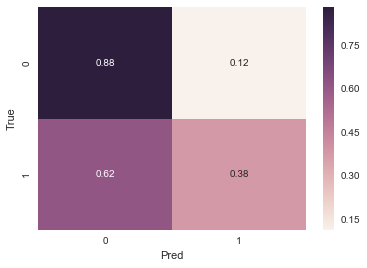

Confusion Matrix:
[[7030  917]
 [ 284  174]]


In [143]:
# Get confusion matrix on test set
y_pred = rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

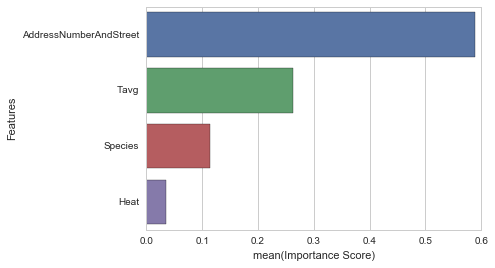

In [144]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)